In this project, we work with a real-world dataset from kaggle https://www.kaggle.com/datasets/hellbuoy/car-price-prediction and guide you through the complete Machine Learning pipeline — from data exploration to building regression models and enhancing their performance.

We start with Exploratory Data Analysis (EDA) to explore how features like engine size, horsepower, and mileage influence car prices. Next, we move on to data preprocessing, where we clean and prepare the data for modeling.

We begin by applying Multiple Linear Regression to make predictions. But we don't stop there — to boost our model's performance, we introduce Polynomial Regression, allowing us to better capture non-linear relationships, reduce error rates, and achieve greater accuracy.

This project is based on the Car Price dataset and is implemented entirely in Python, using popular libraries such as pandas, matplotlib, seaborn, and scikit-learn.

In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data using pandas

In [43]:
# Load dataset
data = pd.read_csv("/content/drive/MyDrive/CarPrice_Assignment.csv")

In [44]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [45]:
#It is to know number of rows and columns in our dataset
data.shape

(205, 26)

In [46]:
#checking for number of null values in each column
data.isna().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Exploratory Data Analysis (EDA)

In [48]:
data_EDA = data.copy()
data_EDA.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Text(0.5, 1.0, 'Distribution of Car Prices by Fuel type')

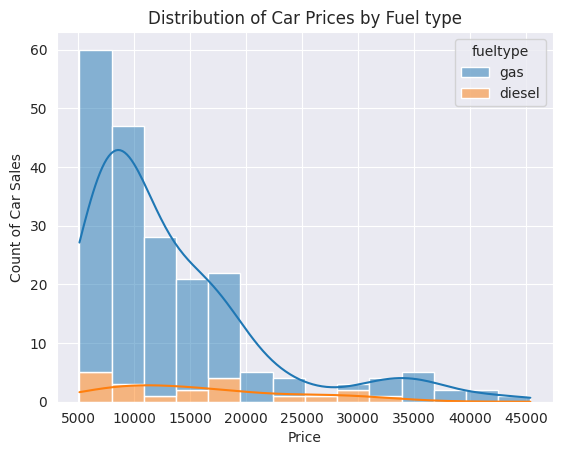

In [49]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA, x = 'price',kde=True,hue='fueltype',multiple='stack')
plt.ylabel("Count of Car Sales")
plt.xlabel("Price")
plt.title("Distribution of Car Prices by Fuel type")

Inference:

*   The plot shows the distribution of car prices, separated by fuel type (gas,diesel)
*   A large number of cars (high count) are sold at lower prices — like cheap or budget cars.
*   The price increases (moving right on the x-axis), the bars get shorter, meaning fewer cars are sold at higher prices (expensive cars are rarer).
*   gas cars have a higher count, especially in the lower price ranges.





Text(0.5, 1.0, 'Distribution of Car Prices by Aspiration')

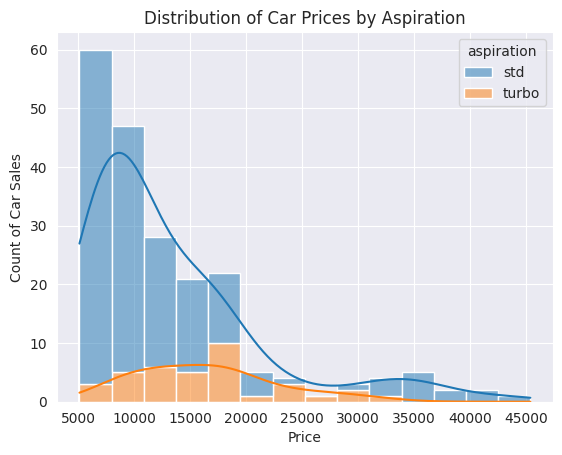

In [50]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA, x = 'price',kde=True,hue='aspiration',multiple='stack')
plt.ylabel("Count of Car Sales")
plt.xlabel("Price")
plt.title("Distribution of Car Prices by Aspiration")

Inference:

The majority of cars in the dataset have
standard (std) aspiration, as seen from the taller bars.

Turbocharged cars are fewer in number compared to standard ones.

Most standard-aspiration cars are concentrated at the lower price ranges.

Turbocharged cars tend to have a slightly higher price range on average, though they still appear across lower and mid price levels too.

Overall, turbo cars are relatively less common but can be associated with higher-priced models.




Text(0.5, 1.0, 'Distribution of Car Prices by Number of Doors')

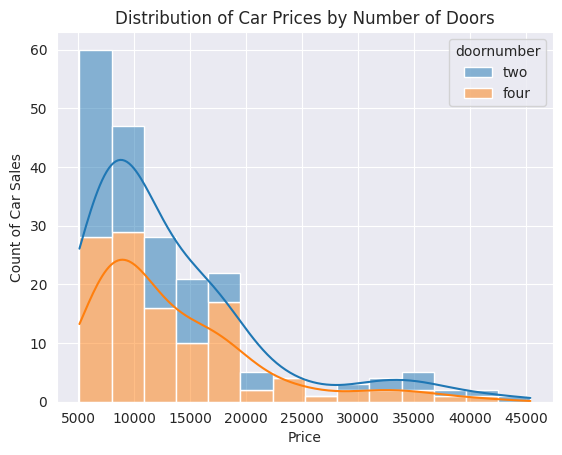

In [51]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA, x = 'price',kde=True,hue='doornumber',multiple='stack')
plt.ylabel("Count of Car Sales")
plt.xlabel("Price")
plt.title("Distribution of Car Prices by Number of Doors")

Inference:

The plot visualizes the distribution of car prices, split by the number of doors (2-door vs. 4-door).

2-door cars are typically concentrated in the lower price range, with a higher frequency of sales at cheaper price points.

4-door cars, on the other hand, are more spread out across a wider range of prices, showing a slightly more even distribution between lower and mid-range prices.

The number of 2-door cars tends to decrease as the price increases, indicating that fewer high-priced 2-door cars exist in the dataset.

In contrast, 4-door cars show a more consistent presence across both lower and higher price ranges, suggesting that 4-door cars are available at a variety of price points.

Text(0.5, 1.0, 'Distribution of cacr prices by carbody')

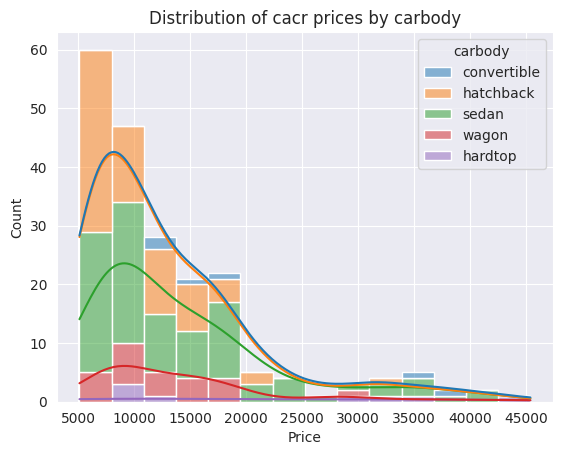

In [52]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA, x = 'price',kde=True,hue='carbody',multiple='stack')
plt.ylabel("Count")
plt.xlabel("Price")
plt.title("Distribution of cacr prices by carbody")

Inference:

The plot displays the distribution of car prices, grouped by car body type (such as sedan, hatchback, etc.).

Sedan cars appear to have the highest number of sales, with a large portion concentrated in the mid-range price points.

Hatchbacks and convertibles tend to show a smaller number of sales, and their price distributions may be more spread out, with fewer cars in the higher price ranges.

Text(0.5, 1.0, 'Distribution of car prices by drivewheel')

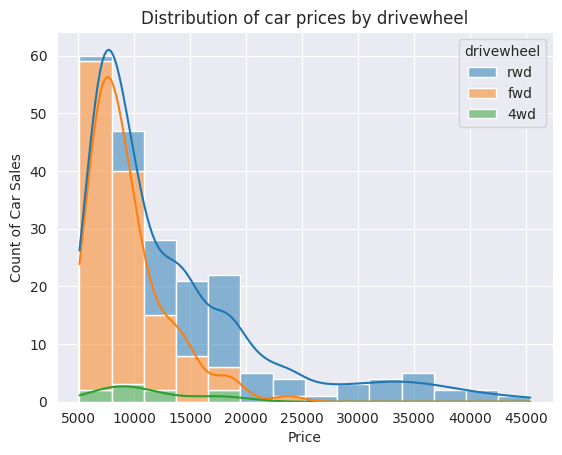

In [53]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA, x = 'price',kde=True,hue='drivewheel',multiple='stack')
plt.ylabel("Count of Car Sales")
plt.xlabel("Price")
plt.title("Distribution of car prices by drivewheel")

Inference:

The plot shows the distribution of car prices, grouped by the type of drivewheel (e.g., front-wheel drive, rear-wheel drive, or 4-wheel drive).

Front-wheel drive (FWD) cars dominate in terms of the number of sales, with a higher frequency of cars priced in the lower to mid-range.

Rear-wheel drive (RWD) and all-wheel drive (4WD) cars are less common, with their distributions spread across a wider price range, indicating that these types may appeal to different market segments

Text(0.5, 1.0, 'Distribition of car prices by engine location')

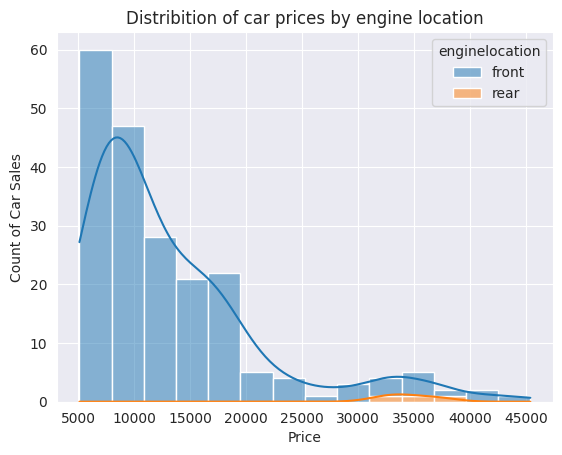

In [54]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA, x = 'price',kde=True,hue='enginelocation',multiple='stack')
plt.ylabel("Count of Car Sales")
plt.xlabel("Price")
plt.title("Distribition of car prices by engine location")

Inference:

The plot shows the distribution of car prices, grouped by engine location (front-engine vs. rear-engine).

Front-engine cars dominate the dataset, with a significantly higher count of sales, and most of these cars are priced in the lower to mid-price range.

Rear-engine cars, which are less common, are spread across a wider price range, though they tend to show lower sales overall.

Text(0.5, 1.0, 'Distribution of car prices by engine type')

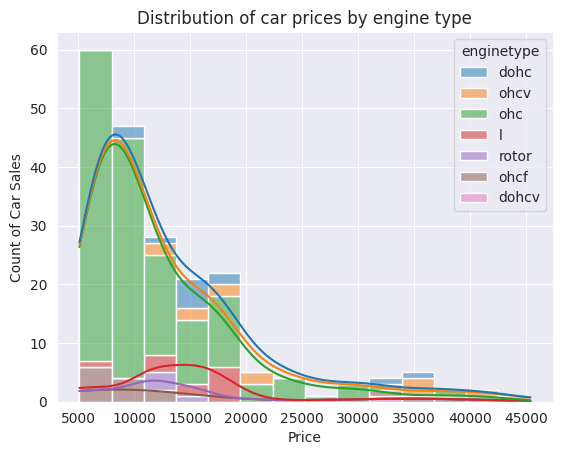

In [55]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA, x = 'price',kde=True,hue='enginetype',multiple='stack')
plt.ylabel("Count of Car Sales")
plt.xlabel("Price")
plt.title("Distribution of car prices by engine type")

Inference:

The plot shows the distribution of car prices, grouped by engine type.

ohc engines appear to be the most common, with a high count of sales, and these cars are concentrated in the lower to mid-price range.

ohcv and dohc engines are less common, with their distributions spanning across higher price ranges. These engine types may indicate cars that are larger or more powerful, and are priced at a premium.

Text(0.5, 1.0, 'Distribution of car prices by cylinder number')

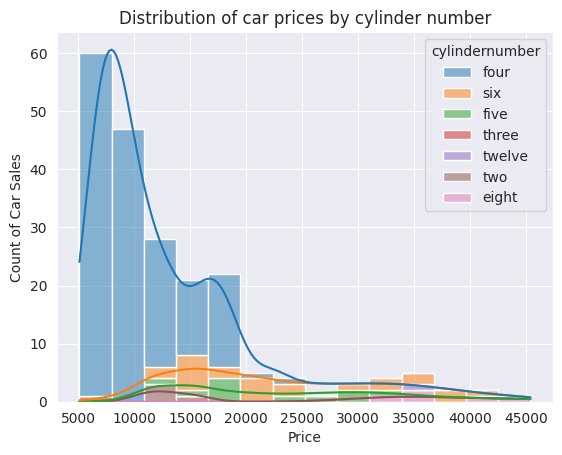

In [56]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA, x = 'price',kde=True,hue='cylindernumber',multiple='stack')
plt.ylabel("Count of Car Sales")
plt.xlabel("Price")
plt.title("Distribution of car prices by cylinder number")

Inference:

The plot shows the distribution of car prices grouped by number of cylinders (e.g., 4, 6, 8 cylinders, etc.).

4-cylinder cars dominate the dataset, with the highest count of sales, especially in the lower to mid-price range.

Cars with 5, 6, and 8 cylinders are less common and tend to appear at higher price points, indicating that vehicles with more cylinders (and likely more powerful engines) are priced higher.

Cars with 3 cylinders or 2 cylinders (if present) are very rare and usually priced lower, typically representing compact or budget vehicles

Text(0.5, 1.0, 'Distribution of car prices by Fueltype')

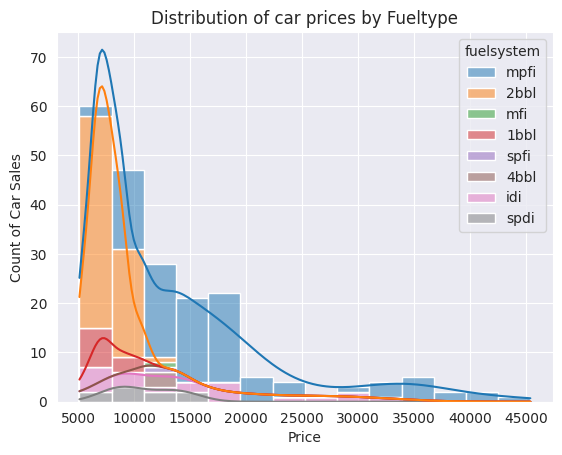

In [57]:
sns.set_style("darkgrid")
sns.histplot(data=data_EDA, x = 'price',kde=True,hue='fuelsystem',multiple='stack')
plt.ylabel("Count of Car Sales")
plt.xlabel("Price")
plt.title("Distribution of car prices by Fueltype")

Inference:

The plot shows the distribution of car prices grouped by fuel system type (e.g., MPFI, 2BBL, 1BBL, etc.).

MPFI (Multi-Point Fuel Injection) is the most common fuel system, with the highest number of cars sold, especially in the lower to mid-price range.

2BBL (Two-barrel carburetor) and 1BBL (Single-barrel carburetor) systems are less common and are mostly concentrated at lower price points, indicating older or simpler engine technologies

In [58]:
#Identify categorical columns and apply Label Encoding
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()

In [59]:
for col in categorical_columns:
    data[col + '_encoded'] = le.fit_transform(data[col])
print(data)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   car_ID                  205 non-null    int64  
 1   symboling               205 non-null    int64  
 2   CarName                 205 non-null    object 
 3   fueltype                205 non-null    object 
 4   aspiration              205 non-null    object 
 5   doornumber              205 non-null    object 
 6   carbody                 205 non-null    object 
 7   drivewheel              205 non-null    object 
 8   enginelocation          205 non-null    object 
 9   wheelbase               205 non-null    float64
 10  carlength               205 non-null    float64
 11  carwidth                205 non-null    float64
 12  carheight               205 non-null    float64
 13  curbweight              205 non-null    int64  
 14  enginetype              205 non-null    ob

In [61]:
#Drop the original categorical columns after encoding
data.drop(categorical_columns, axis=1, inplace=True)
print(data)

     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
200     201         -1      109.1      188.8      68.9       55.5        2952   
201     202         -1      109.1      188.8      68.8       55.5        3049   
202     203         -1      109.1      188.8      68.9       55.5        3012   
203     204         -1      109.1      188.8      68.9       55.5        3217   
204     205         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio 

In [62]:
data.shape

(205, 26)

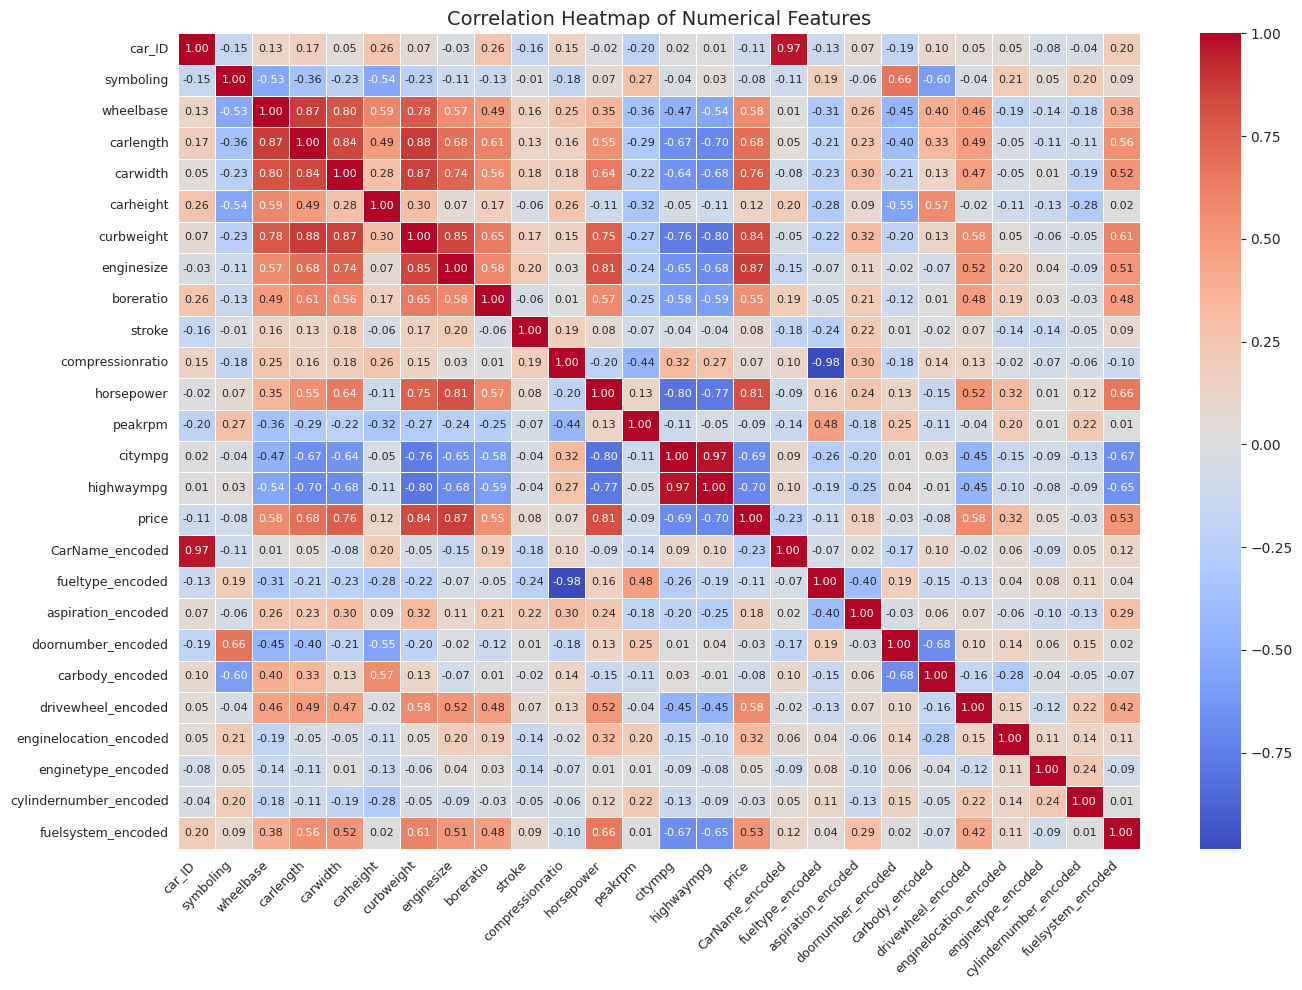

In [63]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))  # Increased size

# Create the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,              # Show correlation numbers
    fmt=".2f",               # Format as decimal
    cmap="coolwarm",         # Color map
    linewidths=0.5,          # Line between boxes
    annot_kws={"size": 8}    # Smaller font size inside boxes
)

# Rotate axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)

# Title
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)

# Show plot
plt.tight_layout()
plt.show()


Inference:

Strongly correlated features:

Price shows a strong positive correlation with features like engine size, horsepower, and curb weight.
→ This suggests that larger engines, more powerful cars, and heavier vehicles tend to have higher prices.

Price also has a moderate positive correlation with width of the car, meaning wider cars might generally be more expensive.

Negative correlations:

Price is negatively correlated with city mileage and highway mileage.
→ This means that cars with better fuel efficiency tend to be cheaper.

Highly correlated features among themselves:

Engine size is highly correlated with horsepower and curb weight.
→ Bigger engines typically produce more power and add more weight to the car.

Features with very low or no correlation:

Some features (like number of doors, peak RPM) show little to no strong correlation with price, meaning they may not be very useful for predicting price.



In [64]:

#Split data into features (X) and target (y)
X = data.drop(['car_ID', 'price','CarName_encoded'], axis=1)  # Drop 'car_ID' and target column 'price'
y = data['price']  # Target is 'price'

In [65]:
X.shape

(205, 23)

In [66]:
print(y.shape)

(205,)


In [67]:
#Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [68]:
#Feature Scaling using MinMaxScaler
scaler_X = MinMaxScaler()  # Scaler for X
scaler_y = MinMaxScaler()  # Scaler for y

In [69]:
# Fit and transform on training data
X_train = scaler_X.fit_transform(X_train)
y_train= scaler_y.fit_transform(y_train.values.reshape(-1, 1))
print(X_train)
print(X_train.shape)

[[0.4        0.63103448 0.52413793 ... 0.5        0.33333333 0.42857143]
 [0.4        0.73448276 0.72586207 ... 0.33333333 0.33333333 0.71428571]
 [0.4        0.3137931  0.43275862 ... 0.5        0.33333333 0.14285714]
 ...
 [0.6        0.27241379 0.35689655 ... 0.5        0.33333333 0.14285714]
 [1.         0.56206897 0.67068966 ... 0.         0.5        0.71428571]
 [0.4        0.47586207 0.68965517 ... 0.83333333 0.5        0.71428571]]
(164, 23)


In [70]:
print(y_train)
print(y_train.shape)

[[0.32833524]
 [0.25971898]
 [0.04468497]
 [0.05910829]
 [0.09872896]
 [0.02758056]
 [0.04803634]
 [0.29248796]
 [0.19477682]
 [0.02921901]
 [0.28399782]
 [0.04917829]
 [0.09507969]
 [0.05538454]
 [0.25152674]
 [0.08269202]
 [0.16699767]
 [0.79216524]
 [0.00672757]
 [0.10215481]
 [0.29991063]
 [0.15217715]
 [0.28263244]
 [0.13852341]
 [0.043121  ]
 [0.39352564]
 [0.05404399]
 [0.41954223]
 [0.12976019]
 [0.04518147]
 [0.32351919]
 [0.06169008]
 [0.02425401]
 [0.28739884]
 [0.10972643]
 [0.19430515]
 [0.18981183]
 [0.03850355]
 [0.07047813]
 [0.06183903]
 [0.33518693]
 [0.29112259]
 [0.32351919]
 [0.28255797]
 [0.02658756]
 [0.14721215]
 [0.06183903]
 [0.71769028]
 [0.04644754]
 [0.        ]
 [0.05404399]
 [0.29683233]
 [0.13596644]
 [0.03125465]
 [0.25798123]
 [0.21664763]
 [0.03502805]
 [0.29310858]
 [0.34337918]
 [0.07298545]
 [0.3125962 ]
 [0.08539794]
 [0.68045281]
 [0.2697731 ]
 [0.04984857]
 [0.3061417 ]
 [0.00697582]
 [0.18176853]
 [0.10865895]
 [0.28578521]
 [0.07186833]
 [0.28

In [71]:
# Fit and transform on test data
X_test = scaler_X.transform(X_test)
y_test= scaler_y.transform(y_test.values.reshape(-1, 1))

In [72]:
print(X_test)
print(X_test.shape)

[[ 0.4         0.58275862  0.76551724  0.48571429  0.65833333  0.62794838
   0.54296875  0.77142857  0.62857143  0.0625      0.55084746  0.51020408
   0.09375     0.17647059  1.          0.          0.          0.75
   1.          0.          0.5         0.5         0.71428571]
 [ 0.4         0.44482759  0.57931034  0.58095238  0.35        0.54917668
   0.23828125  0.42142857  0.63333333  0.          0.45762712  0.55102041
   0.09375     0.17647059  1.          1.          1.          0.5
   0.          0.          0.5         0.16666667  0.71428571]
 [ 0.4         0.36551724  0.49655172  0.32380952  0.575       0.21495327
   0.1953125   0.56428571  0.66666667  0.09375     0.19067797  0.42857143
   0.4375      0.52941176  1.          0.          0.          0.75
   0.5         0.          0.5         0.33333333  0.14285714]
 [ 1.          0.43103448  0.72413793  0.44761905  0.69166667  0.37338674
   0.19921875  0.71428571  0.47619048  0.144375    0.24576271  0.44897959
   0.25        0

In [73]:
print(y_test)
print(y_test.shape)

[[6.36562236e-01]
 [3.16299265e-01]
 [1.09999504e-01]
 [1.67121791e-01]
 [5.74201877e-01]
 [6.65557817e-02]
 [6.62827069e-02]
 [1.02775433e-01]
 [1.26110918e-01]
 [6.59599821e-02]
 [2.02993893e-01]
 [7.74539497e-02]
 [3.26746438e-01]
 [1.20897671e-01]
 [8.89777072e-01]
 [3.40102279e-02]
 [8.19224468e-04]
 [1.86460454e-01]
 [7.62375254e-02]
 [1.20202572e-01]
 [8.38339705e-02]
 [2.08058190e-01]
 [7.77270245e-02]
 [3.37868030e-02]
 [3.90745246e-02]
 [8.98589941e-01]
 [1.12233752e-01]
 [2.05972891e-01]
 [7.15207785e-02]
 [1.94181024e-01]
 [5.07273720e-01]
 [2.75805571e-02]
 [6.90134551e-02]
 [4.06310511e-01]
 [6.38250335e-02]
 [5.72414478e-01]
 [1.52450226e-01]
 [1.44655181e-01]
 [9.42977012e-02]
 [2.32634924e-01]
 [5.82145872e-02]]
(41, 1)


In [74]:
#Initialize the Linear Regression model
model = LinearRegression()

In [75]:
#Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [76]:
#Make predictions on the test data
y_pred = model.predict(X_test)

In [77]:
# Step 10: Evaluate the model performance using MAE, MSE, and RMSE
MAE = mean_absolute_error(y_true=y_test, y_pred=y_pred)
MSE = mean_squared_error(y_true=y_test, y_pred=y_pred)
RMSE = np.sqrt(MSE)

In [78]:
# Print the results
print("Mean Absolute Error (MAE):", MAE)
print("Mean Squared Error (MSE):", MSE)
print("Root Mean Squared Error (RMSE):", RMSE)

Mean Absolute Error (MAE): 0.06271802418309488
Mean Squared Error (MSE): 0.009808949856098533
Root Mean Squared Error (RMSE): 0.09904014264982929


In [79]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8965265035488764
0.7983838478445057


In [80]:
print(model.intercept_)
print(model.coef_)

[-0.05081238]
[[ 0.02640753  0.14607457 -0.08041779  0.15536973  0.02748424  0.1009665
   0.5968662  -0.08341907 -0.11084336  0.17392259  0.07784696  0.10725977
  -0.20581438  0.07010507  0.0898517   0.01619125 -0.03641008 -0.09990736
   0.0537214   0.27096255  0.05268446 -0.07039288 -0.01143574]]


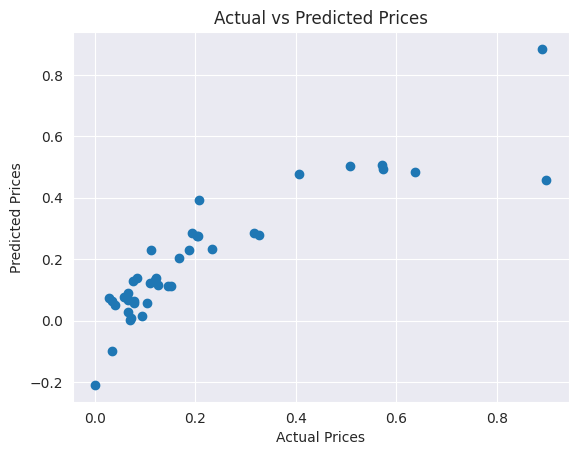

In [81]:
# Optional: Visualize the predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

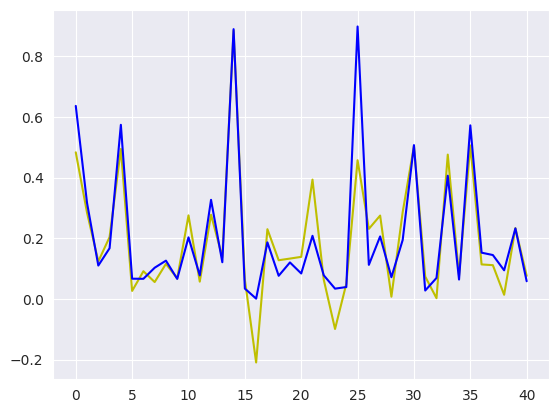

In [82]:
import matplotlib.pyplot as plt
plt.plot(y_pred,'y')
plt.plot(y_test,'b')
plt.show()

Inference:

The plot shows a comparison between:

y_pred → the predicted car prices (yellow line)

y_test → the actual car prices from the test data (blue line).

The yellow line (predictions) closely follows the blue line (actual values), it means that the model is predicting prices accurately.

# Polynomial Regression

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
data = pd.read_csv("/content/drive/MyDrive/CarPrice_Assignment.csv")

In [3]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()
for col in categorical_columns:
    data[col + '_encoded'] = le.fit_transform(data[col])
print(data)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [4]:
#Drop the original categorical columns after encoding
data.drop(categorical_columns, axis=1, inplace=True)
print(data)

     car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0         1          3       88.6      168.8      64.1       48.8        2548   
1         2          3       88.6      168.8      64.1       48.8        2548   
2         3          1       94.5      171.2      65.5       52.4        2823   
3         4          2       99.8      176.6      66.2       54.3        2337   
4         5          2       99.4      176.6      66.4       54.3        2824   
..      ...        ...        ...        ...       ...        ...         ...   
200     201         -1      109.1      188.8      68.9       55.5        2952   
201     202         -1      109.1      188.8      68.8       55.5        3049   
202     203         -1      109.1      188.8      68.9       55.5        3012   
203     204         -1      109.1      188.8      68.9       55.5        3217   
204     205         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio 

In [5]:

#Split data into features (X) and target (y)
X = data.drop(['car_ID', 'price','CarName_encoded'], axis=1)  # Drop 'car_ID' and target column 'price'
y = data['price']  # Target is 'price'

In [6]:
X

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,highwaympg,fueltype_encoded,aspiration_encoded,doornumber_encoded,carbody_encoded,drivewheel_encoded,enginelocation_encoded,enginetype_encoded,cylindernumber_encoded,fuelsystem_encoded
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,27,1,0,1,0,2,0,0,2,5
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,27,1,0,1,0,2,0,0,2,5
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,26,1,0,1,2,2,0,5,3,5
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,30,1,0,0,3,1,0,3,2,5
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,22,1,0,0,3,0,0,3,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,28,1,0,0,3,2,0,3,2,5
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,25,1,1,0,3,2,0,3,2,5
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,23,1,0,0,3,2,0,5,3,5
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,27,0,1,0,3,2,0,3,3,3


In [20]:
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

y_scl = MinMaxScaler()

y = y_scl.fit_transform(y.values.reshape(-1, 1))

poly = PolynomialFeatures(degree=2)
x = poly.fit_transform(X)


#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)



print(model.score(x,y))


y_pred = model.predict(x)

0.9987451406621609


In [23]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,mean_squared_error

MAE = mean_absolute_error(y_true=y, y_pred=y_pred)
MSE = mean_squared_error(y_true=y, y_pred=y_pred)
RMSE = root_mean_squared_error(y_true=y, y_pred=y_pred)


print("MAE",MAE)
print("MSE",MSE)
print("RMSE",RMSE)

MAE 0.0019367785250500146
MSE 4.9115445775745804e-05
RMSE 0.007008241275508842


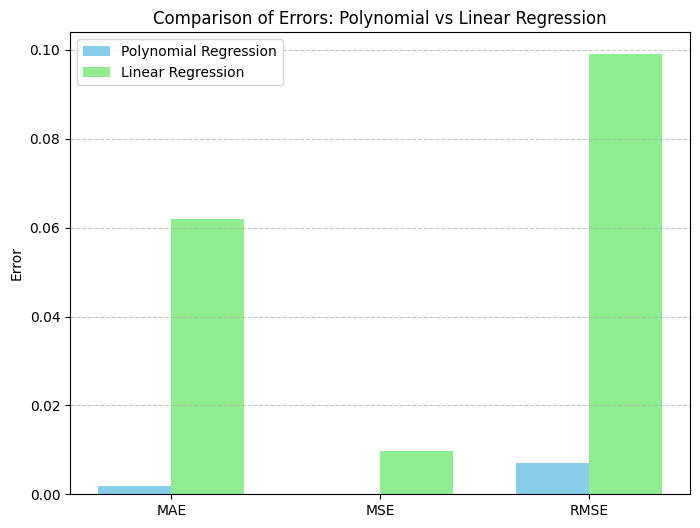

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Data
name = ['MAE', 'MSE', 'RMSE']
poly_list = [0.0019, 0.00005, 0.0070]
lin_list = [0.062, 0.0098, 0.0990]

# Set bar positions
x = np.arange(len(name))  # [0, 1, 2]
width = 0.35  # width of the bars

# Create plot
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, poly_list, width, label='Polynomial Regression', color='skyblue')
bars2 = ax.bar(x + width/2, lin_list, width, label='Linear Regression', color='lightgreen')

# Add labels, title and custom x-axis tick labels
ax.set_ylabel('Error')
ax.set_title('Comparison of Errors: Polynomial vs Linear Regression')
ax.set_xticks(x)
ax.set_xticklabels(name)
ax.legend()

# Add grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


Conclusion:

For all three error metrics (MAE, MSE, RMSE), the Polynomial Regression model performs much better than the Linear Regression model.

Polynomial Regression has significantly lower errors, meaning it fits the data much more accurately.

Multilinear Regression has higher errors, suggesting it cannot capture the complexity of the data as well as Polynomial Regression.